# Ejercicio 1

## Adquisición de datos

In [13]:
import pandas as pd

df = pd.read_csv('data\mall_customers.csv')

# print(df.head())

## Exploration Data Analysis

### Indagación de datos

In [14]:
print(df.info())
# print(df.describe())
# print(df.head())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


- No hay datos nulos para tratar.

- La columna `Gender` tiene datos no numéricos. Los algoritmos basados en distancias euclideanas, como K-Means, no admiten este tipo de datos. Para la etapa de ajuste del modelo, no podrá ser incluida. 

#### Visualización
Para representar este tipo de datos en un plano con valores mixtos (que *sí* usan distancias euclideanas), es más útil mapear las categorías con otros patrones no euclideanos como colores, figuras geométricas o símbolos. 
Considerando lo anterior, se usará:

- `Gender`: `F`  --> |
- `Gender`: `M`  --> -
- `n_cluster`: `i` --> * :i pertenece a [1;9]

Más en las Conclusiones.

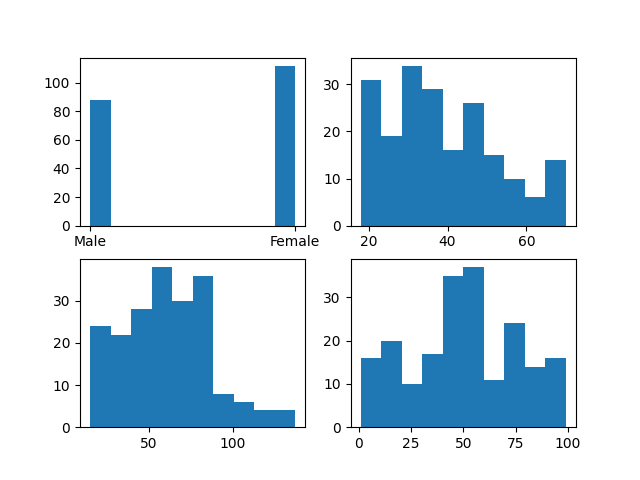

In [15]:
from matplotlib import pyplot as plt

dataset = df.drop(columns=['CustomerID'])

plt.figure()
for i, col in enumerate(dataset.columns):
    plt.subplot(2,2,i+1)
    plt.hist(dataset[col])


##### Pre-Visualización 3D (de las 3 caracteristicas)

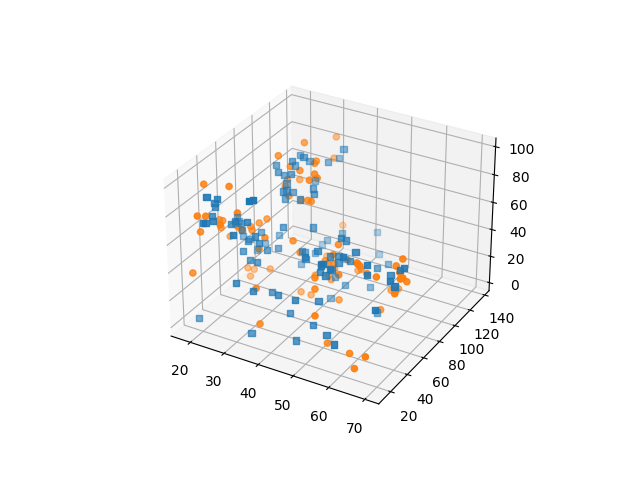

In [16]:
%matplotlib widget
from matplotlib import pyplot as plt

ds_f = dataset[(dataset['Gender'] == 'Female')]
ds_m = dataset[(dataset['Gender'] == 'Male')]

plt.figure()
ax = plt.axes(projection='3d')
indice_X = ds_f.columns[1]
indice_Y = ds_f.columns[2]
indice_Z = ds_f.columns[3]
ax.scatter3D(ds_f[indice_X], ds_f[indice_Y], ds_f[indice_Z], marker='s')
ax.scatter3D(ds_m[indice_X], ds_m[indice_Y], ds_m[indice_Z], marker='o')
plt.show()

# En esta instancia los dejo tambien representados por distintos 
# colores para visualizar algun patron

##### Pre-Visualización 2D

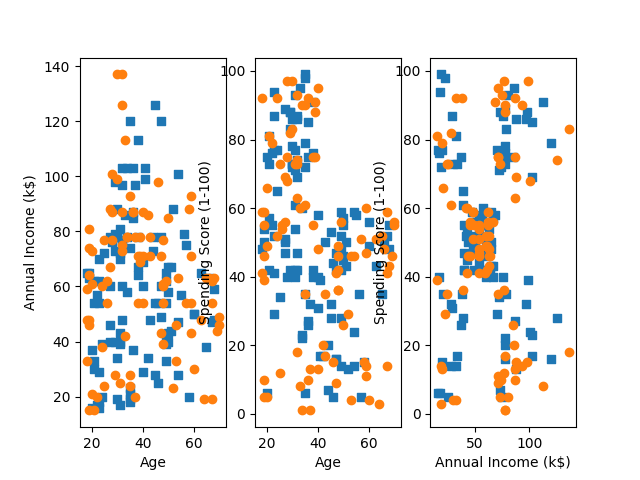

In [17]:
%matplotlib widget
import numpy as np
ds_f = dataset[(dataset['Gender'] == 'Female')]
ds_m = dataset[(dataset['Gender'] == 'Male')]
pares_a_comparar = [(1,2), (1,3), (2,3)]

# plt.figure()
for i, par in enumerate(pares_a_comparar):
    columna_a = ds_f.columns[par[0]]
    columna_b = ds_f.columns[par[1]]
    plt.subplot(1,3,i+1)
    plt.scatter(ds_f[columna_a], ds_f[columna_b], marker='s')
    plt.scatter(ds_m[columna_a], ds_m[columna_b], marker='o')
    plt.xlabel(columna_a)
    plt.ylabel(columna_b)

# En esta instancia los dejo tambien representados por distintos 
# colores para visualizar algun patron

## Modelado

### Selección de hiperparámetros: Número de clusters

Busco el mejor valor de `N`, la cantidad de clusters. Para eso, genero la 'Elbow Curve'

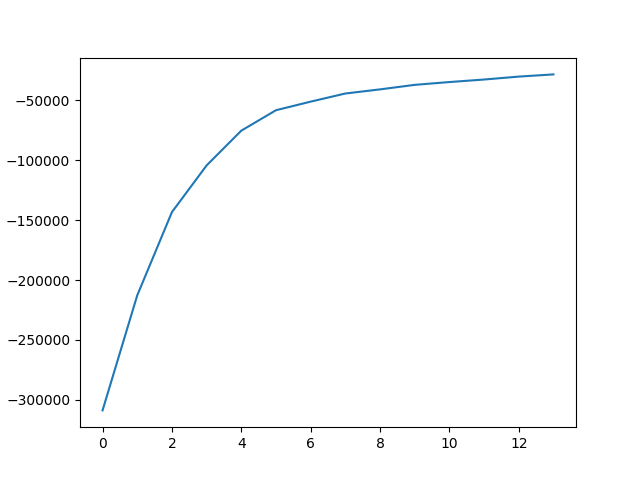

In [18]:
from sklearn.cluster import KMeans
dataset_reducido = dataset.drop(columns=['Gender'])
CANTIDAD_MAXIMA_CLUSTERS = 15
lista_modelos = [KMeans(n_clusters=i) for i in range(1,CANTIDAD_MAXIMA_CLUSTERS)]
lista_scores = [modelo.fit(dataset_reducido).score(dataset_reducido) for modelo in lista_modelos]
plt.figure()
plt.plot([i for i in range(len(lista_scores))],lista_scores)

Observando la curva, adopté n_clusters = 5. Más en las Observaciones

### Entrenamiento y clustering

In [19]:
%matplotlib widget
import numpy as np

N_CLUSTERS = 5
modelo = KMeans(N_CLUSTERS)
modelo.fit(dataset_reducido)
columna_clusters = modelo.predict(dataset_reducido)
dataset['cluster'] = columna_clusters


## Visualización e interpretación

### Visualización 3D

x: Age
y: Annual Income (k$)
z: Spending Score (1-100)


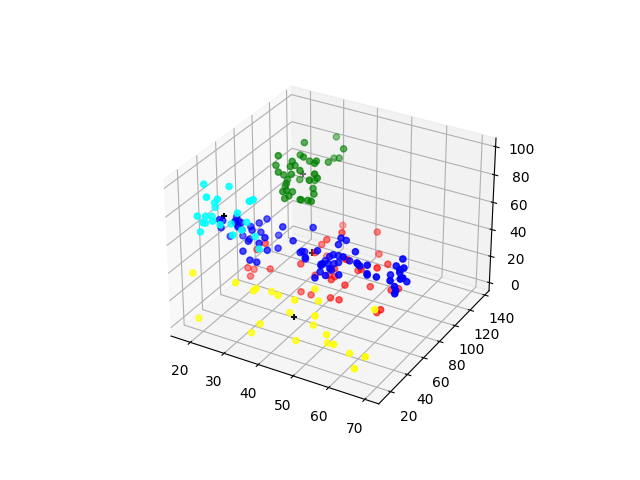

In [23]:
%matplotlib widget
from matplotlib import pyplot as plt
# print(dataset)

plt.figure()
ax = plt.axes(projection='3d')
dr = dataset
ax.scatter(dr[dr.columns[1]], dr[dr.columns[2]], dr[dr.columns[3]], c=dr[dr.columns[-1]])
ax.scatter(modelo.cluster_centers_[:,0],modelo.cluster_centers_[:,1],modelo.cluster_centers_[:,2], c='black', marker='+')
print(f'x: {dr.columns[1]}')
print(f'y: {dr.columns[2]}')
print(f'z: {dr.columns[3]}')
plt.show()

### Visualización 2D

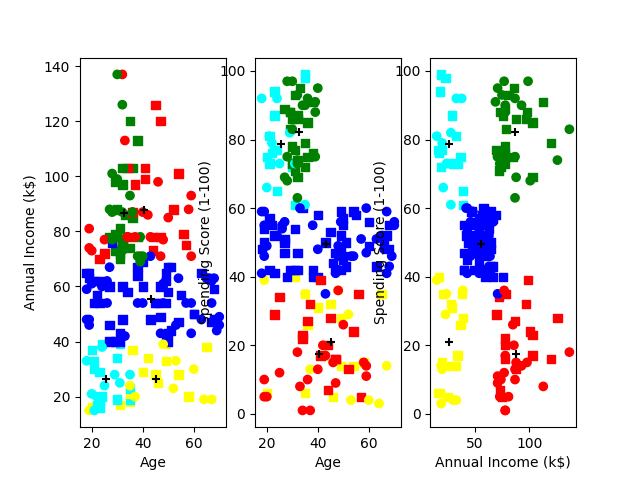

In [21]:
# Cambio las etiquetas de clusters por colores
mapa_colores_clusters = {
    0:'red',
    1:'green',
    2:'blue',
    3:'cyan',
    4:'yellow',
    5:'black'
    }
dataset['color_cluster'] = pd.Series(columna_clusters).replace(mapa_colores_clusters.keys(),mapa_colores_clusters.values())

# Grafico de a pares
ds_f = dataset[(dataset['Gender'] == 'Female')]
ds_m = dataset[(dataset['Gender'] == 'Male')]
pares_a_comparar = [(1,2), (1,3), (2,3)]

plt.figure()
for i, par in enumerate(pares_a_comparar):
    columna_a = ds_f.columns[par[0]]
    columna_b = ds_f.columns[par[1]]
    plt.subplot(1,3,i+1)
    plt.scatter(ds_f[columna_a], ds_f[columna_b], marker='s', c=ds_f[ds_f.columns[-1]])
    plt.scatter(ds_m[columna_a], ds_m[columna_b], marker='o', c=ds_m[ds_m.columns[-1]])
    plt.scatter(modelo.cluster_centers_[:,par[0]-1], modelo.cluster_centers_[:,par[1]-1], c='black', marker='+')
    plt.xlabel(columna_a)
    plt.ylabel(columna_b)
    
plt.show()

### Interpretación

La primer elección para el npumero de clústers fue `k = 6`, pero despúes de compararlo con `k = 5`, la diferencia es principalmente una segmentación del clúster central en un grupo menor a 40 años y otro mayor. Si bien se la puede usar para proponer más estrategias, en este análisis usé 5 clusters.

A  Se puede observar del clúster azul, que las personas menores a 35 años con los ingresos más bajos son las que mayor score de gasto tienen. De acá, se podría elaborar estrategias de marketing especializado a esos clientes, como:

- Planes de cuotas sin interés para productos como electrodomésticos
- Ofertas en productos tecnológicos
- Evaluar más estrategias en función de las personas menores a 25 años, porque se observa más densidad ahí

B Del grupo amarillo se ve que abarca homogéneamente a todas las edades y al rango medio de ingresos, si se tiene en cuenta hasta 100 en lugar de 140 (es decir excluyendo puntos muy alejados). Este grupo también tiene un score de gasto alrededor del rango medio. Como estrategias, se podría:
- Ofrecerles cupones de descuento para cualquier compra
- Descuentos de contado
- Planes de cuotas para productos caros



## Conclusiones

Entre las primeras consideraciones, se descartó la columna `Gender`. Hacer un análisis teniendo en cuenta esta característica puede ser de mucha importancia para responder a las mismas preguntas de este informe.

Un posible camino para tenerla en cuenta, es utilizando la distancia [*Gower*](https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad) y el algoritmo [***DBSCAN***](https://scikit-learn.org/stable/modules/clustering.html#dbscan) para generar los clusters. 

Con esto, se podrían comparar los resultados de las mismas hipótesis planteadas en la solución con **K-Means**